In [83]:
import os
import cv2

In [84]:

train_horse_dir = os.path.join('horse-or-human/horses')


train_human_dir = os.path.join('horse-or-human/humans')

In [85]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:6])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:6])

['horse36-4.png', 'horse19-7.png', 'horse46-8.png', 'horse29-0.png', 'horse24-2.png', 'horse26-6.png']
['human02-12.png', 'human09-27.png', 'human14-15.png', 'human10-15.png', 'human02-19.png', 'human13-16.png']


In [86]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [87]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4


pic_index = 0

<Figure size 432x288 with 0 Axes>

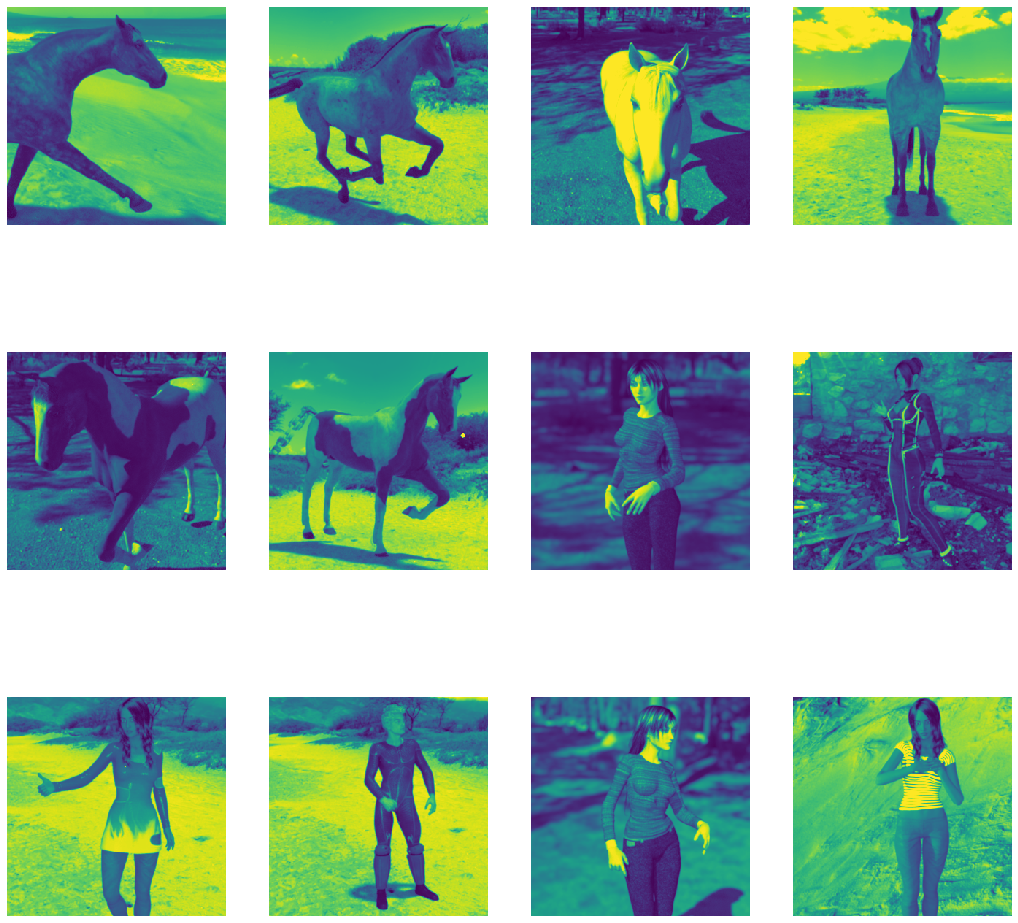

In [76]:

fig = plt.figure()
img =[]
n_row=3 
n_col=4
for i in train_horse_names[:6]:
    img_path = os.path.join(train_horse_dir,i)
    img.append(cv2.imread(img_path,cv2.IMREAD_GRAYSCALE))
for j in train_human_names[:6]:
    img_path = os.path.join(train_human_dir,j)
    img.append(cv2.imread(img_path,cv2.IMREAD_GRAYSCALE))
_,axs = plt.subplots(n_row, n_col, figsize=(18, 18))
axs = axs.flatten()
for img, ax in zip(img, axs):
    ax.imshow(img)
    ax.axis('Off')
plt.show()

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
  
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 51s 6s/step - loss: 1.0158 - acc: 0.4983
Epoch 2/15
8/8 [==============================] - 65s 8s/step - loss: 0.7481 - acc: 0.6133
Epoch 3/15
8/8 [==============================] - 49s 6s/step - loss: 0.7906 - acc: 0.6757
Epoch 4/15
8/8 [==============================] - 65s 8s/step - loss: 0.3841 - acc: 0.8408
Epoch 5/15
8/8 [==============================] - 51s 6s/step - loss: 0.5196 - acc: 0.8010
Epoch 6/15
8/8 [==============================] - 55s 7s/step - loss: 0.5150 - acc: 0.8632
Epoch 7/15
8/8 [==============================] - 61s 8s/step - loss: 0.1625 - acc: 0.9434
Epoch 8/15
8/8 [==============================] - 55s 7s/step - loss: 0.1251 - acc: 0.9511
Epoch 9/15
8/8 [==============================] - 53s 7s/step - loss: 0.2775 - acc: 0.8743
Epoch 10/15
8/8 [==============================] - 52s 6s/step - loss: 0.1019 - acc: 0.9633
Epoch 11/15
8/8 [==============================] - 55s 7s/step - loss: 0.0997 - acc: 0.96

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

ModuleNotFoundError: No module named 'google.colab'